<a href="https://colab.research.google.com/github/shalinikarthick/shalinikarthick/blob/main/shalini_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

                                        PART  1

**1st Jar of ML**

**DATA**

In [39]:
df = pd.read_csv("car_data.csv") # to read the dataset

I **CLEANING**:

1. **Missing data**
  a. impute (replace values with mean, median, mode)
  b. deletion

In [40]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

2.**Duplicates (delete data)**

In [41]:
df = df.drop_duplicates()
df.shape

(804, 12)

**3.Outliers**

In [42]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [43]:
df.Mileage.quantile(0.75)

25213.0

In [44]:
iqr = df.Mileage.quantile(0.75) - df.Mileage.quantile(0.25)
upper_threshold = df.Mileage.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Mileage.quantile(0.25) - (1.5 * iqr)
lower_threshold

-1260.75

values greater than q3 + 1.5iqr -> outlier

values less than q1 - 1.5iqr -> outlier

No Skew in data

5. Covert dtypes if it is not correct format

In [45]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

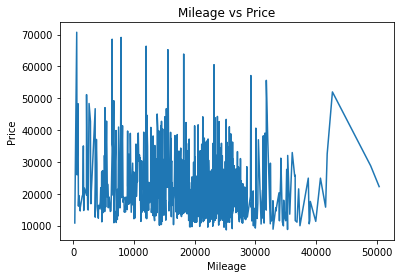

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [46]:
#plot the data
df.groupby('Mileage')['Price'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()
df[['Mileage','Price']].corr()

1) Is there any relationship between the feature and target - Yes

2) Is there any linear relationship between the feature and target - Yes

3) No transformation is required

**2.Encoding**

Here encoding is not needed, since the data is already numerical

**3.SPLIT**

To split the data using sklearn model

train data (70 - 80)%

test data (20 - 30)%

In [47]:
X = df[['Mileage','Cylinder', 'Liter','Cruise','Doors','Sound','Leather']].values #array of features
y = df['Price'].values #array of targets
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test

array([12333.60399301, 15233.15987099, 21281.88048759, 36210.12299596,
       27284.7513282 ,  9720.97888953, 16927.77976099, 40966.60741222,
       15174.34661257, 27788.81323858, 25527.01302661, 30122.42973521,
       24173.52588253, 44084.91421156, 12412.52110687, 30957.08074928,
       23345.32906904, 13998.12927577, 13869.15494228, 21908.36662462,
       22231.56315149, 10921.94537185, 15138.40082402, 11169.91838816,
       31186.74146275, 25148.37918612, 13681.69800349, 28817.08184658,
       33586.90609204, 15505.29380633, 11581.90504445, 25618.2818848 ,
       16218.84786194, 39547.58789964, 12832.46238753, 16428.57898137,
       23733.40224911, 21831.82291637, 12810.91058496, 24903.47773883,
       28829.02800299, 29197.79130048, 30959.93213309, 15327.10032051,
       13471.00508276, 12465.5085234 , 28204.6035781 , 32197.34046608,
       15457.17059153, 30274.71057518, 18543.42704537, 16295.21143755,
       39713.66792194, 22926.09037126, 11615.02101757, 23493.082295  ,
      

4. **NORMALISING/SCALING DATA**

Scaling is not mandatory for linear regression

In [48]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

**2nd Jar of ML**

**II TASK**

It is a** SUPERVISED** learning problem In general, prediction is to be done based on the target variable

**3rd Jar of ML**

**III MODEL**

In [49]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens  - GD(Gradient Descent) is done and we get the final values of m and c

LinearRegression()

In [50]:
print(regressor.intercept_)

5396.780468691681


In [51]:
print(regressor.coef_)

[-1.33949533e-01  4.26410332e+03 -1.13260214e+03  6.08744523e+03
 -1.76799867e+03 -1.72061676e+03  3.22501651e+03]


In [53]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([ 9959.06044442, 17091.64993758, 24864.36356322, 26227.34683516,
       18794.90651071, 15144.89167008, 12944.28327009, 26422.4762976 ,
        9607.06460966, 18500.70371566, 32223.14352768, 18756.46299479,
       15584.79340523, 30711.52548166, 11090.14285115, 26906.75093363,
       24121.34550472, 11948.35750786, 17530.76301056, 23368.53657864,
       31882.10820214, 15935.89866819, 17101.42825348,  8850.62835974,
       33910.59012103, 17724.51579402, 22649.69196545, 27232.41725476,
       23428.78922388, 16183.15773703,  9495.87551164, 19721.60438556,
       22997.56953122, 33578.36027279, 21255.54522796, 13070.18484515,
       13785.81617273, 23773.07671941, 21410.52483743, 14913.7681192 ,
       18538.61143345, 19288.19301905, 18000.76905235, 13815.48004571,
       17948.33369462, 14724.32519408, 17418.35648369, 16964.84043491,
       19963.90629634, 16036.16832394, 23936.6408677 , 17667.09713053,
       35568.71638082, 25499.96586513, 12526.51899767, 21232.67627112,
      

In [54]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12333.603993,9959.060444
1,15233.159871,17091.649938
2,21281.880488,24864.363563
3,36210.122996,26227.346835
4,27284.751328,18794.906511
...,...,...
156,38445.897169,34040.472031
157,11302.902985,9889.139088
158,30575.248821,17381.252463
159,11017.168710,9156.033295


**4th Jar of ML**

**IV. LOSS FUNCTION**

** Parameters can take "infinite" values (smart way to find parameter is Gradient Descent)
* Loss function is a formula to find, how far my predictions are from "true target value"

**5th Jar of ML**

**V LEARNING JAR**

1. Hit & Trial (Time consuming)
2. Gradient Descent 
    1. convex (function with "one" local minima), (GD work always)
    2. non - convex (function with "multiple" local minima), (GD may or may not work)

**6th Jar of ML**

**VI. EVALUATION METRIC**

* Formula used to find which model is "supervision model"
*** R2 score

In [55]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4613395767857462


Since R2 score is 0.46, model is not so best model. I have concluded after applying ML over here.

                                               **PART 2**



**1st Jar of ML**

**DATA**

In [4]:
df = pd.read_csv("car_data.csv") # to read the dataset

**I CLEANING:**

    1. Missing data
      a. impute (replace values with mean, median, mode)
      b. deletion

In [6]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

2. Duplicates (delete data)

In [7]:
df = df.drop_duplicates()
df.shape

(804, 12)

3.Outliers

In [9]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [11]:
df.Mileage.quantile(0.75)

25213.0

In [ ]:
iqr = df.Mileage.quantile(0.75) - df.Mileage.quantile(0.25)
upper_threshold = df.Mileage.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Mileage.quantile(0.25) - (1.5 * iqr)
lower_threshold

-1260.75


values greater than q3 + 1.5iqr -> outlier 

values less than q1 - 1.5iqr -> outlier

No Skew in data

5. Covert dtypes if it is not correct format

In [13]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

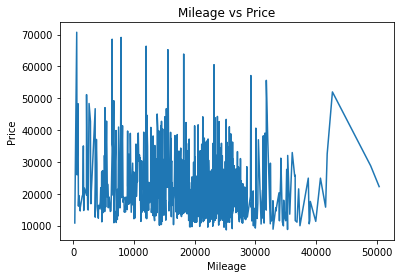

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [17]:
#plot the data
df.groupby('Mileage')['Price'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()
df[['Mileage','Price']].corr()



1) Is there any relationship between the feature and target - Yes 

2) Is there any linear relationship between the feature and target - Yes 

3) No transformation is required

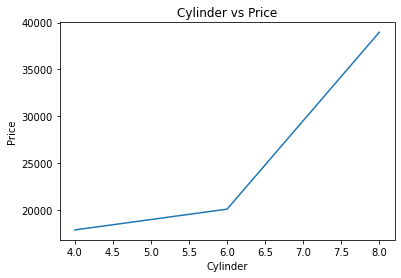

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


In [18]:
df.groupby('Cylinder')['Price'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Cylinder', y='Price', style='o')
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()
df[['Cylinder','Price']].corr()

1) Is there any relationship between the feature and target - Yes

2) Is there any linear relationship between the feature and target - Yes

3) No transformation is required

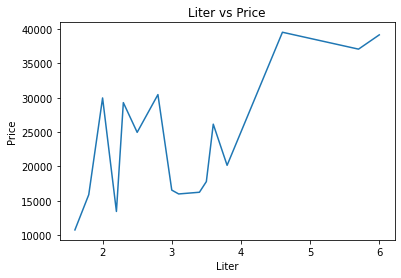

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


In [21]:
df.groupby('Liter')['Price'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Liter', y='Price', style='o')
plt.title('Liter vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()
df[['Liter','Price']].corr()

1) Is there any relationship between the feature and target - Yes

2) Is there any linear relationship between the feature and target - Yes

3) No transformation is required

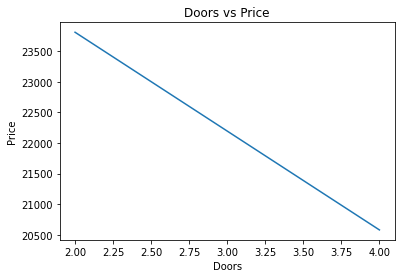

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [23]:
df.groupby('Doors')['Price'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Doors', y='Price', style='o')
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()
df[['Doors','Price']].corr()

1) Is there any relationship between the feature and target - Yes

2) Is there any linear relationship between the feature and target - Yes

3) No transformation is required

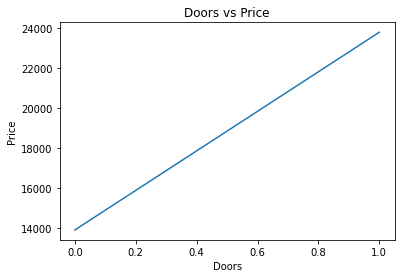

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [24]:
df.groupby('Cruise')['Price'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Cruise', y='Price', style='o')
plt.title('Cruise vs Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()
df[['Cruise','Price']].corr()

1) Is there any relationship between the feature and target - Yes

2) Is there any linear relationship between the feature and target - Yes

3) No transformation is required

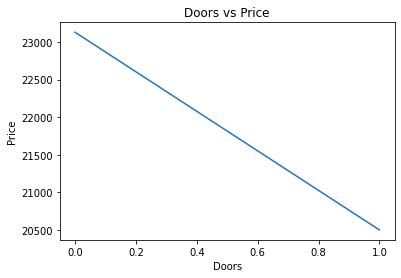

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [26]:
df.groupby('Sound')['Price'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Sound', y='Price', style='o')
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()
df[['Sound','Price']].corr()

1) Is there any relationship between the feature and target - Yes

2) Is there any linear relationship between the feature and target - Yes

3) No transformation is required

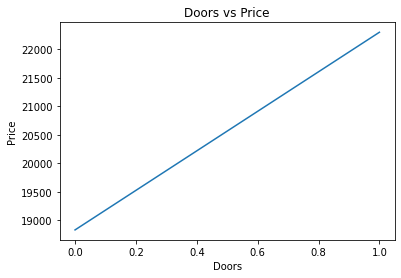

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [27]:
df.groupby('Leather')['Price'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Leather', y='Price', style='o')
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()
df[['Leather','Price']].corr()

1) Is there any relationship between the feature and target - Yes

2) Is there any linear relationship between the feature and target - Yes

3) No transformation is required

2. **Encoding**

 Here encoding is not needed, since the data is already numerical 

**3.SPLIT**

To split the data using sklearn model

train data (70 - 80)%

test data (20 - 30)%

In [31]:
X = df[['Mileage','Cylinder', 'Liter','Cruise','Doors','Sound','Leather']].values #array of features
y = df['Price'].values #array of targets
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test

array([17119.45757241, 12965.22326948, 15118.89322834, 16339.17032393,
       14185.02155274, 13869.15494228, 22104.97357131, 35895.49940993,
       39713.66792194, 21200.69020723, 39875.85425532, 30443.87990023,
       26302.07428434, 21683.03146355, 12257.16408562, 15846.01271234,
       15327.10032051, 39547.58789964, 27703.20399508, 14702.79831983,
       60567.54909331, 16988.30306345, 11555.26740204, 11873.53399479,
       39092.18991832, 16256.23616761, 36210.12299596, 33287.40959869,
       43374.05241996, 16425.17479602, 13007.98417785, 16472.8976476 ,
       15503.50879617, 35651.68001995, 17645.74504414, 38600.23956094,
       20017.96843019, 22311.04951296, 11137.04565492, 30075.99472617,
       23449.30632576, 41419.03726221,  9563.7893088 , 21956.34266271,
       16507.07026749, 18701.22261541, 19177.41206351, 11013.87136774,
       17839.80077059, 16353.09651745, 14116.92150853, 32746.1313865 ,
       24912.08058089, 13162.85205397, 10813.34352137, 52001.99437855,
      

4.** NORMALISING/SCALING DATA**

Scaling is not mandatory for linear regression

In [32]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

**2nd Jar of ML**

**II TASK**

It is a** SUPERVISED** learning problem In general, prediction is to be done based on the target variable

**3rd Jar of ML**

**III MODEL**

In [33]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens  - GD(Gradient Descent) is done and we get the final values of m and c

LinearRegression()

In [34]:
print(regressor.intercept_)

7618.346261619383


In [35]:
print(regressor.coef_)

[-2.20881559e-01  3.83159904e+03 -8.90268787e+02  6.24983560e+03
 -1.23875067e+03 -2.77237322e+03  3.01632330e+03]


In [36]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([24993.73050126,  9713.37003023, 20721.31182436, 27778.74040858,
       14252.35895296, 16607.86705037, 27032.02552836, 23849.11065177,
       34965.16525749, 28823.84316919, 38160.08489688, 21884.01297685,
       22864.87447201, 19832.39154753, 17777.74763512, 15093.3821645 ,
       15321.33193346, 31683.08617127, 16971.73921568, 18086.22732523,
       33069.28049992, 23529.72752774, 17082.07565464,  9758.55390552,
       34578.62252912, 23519.65618209, 26903.77050115, 23168.34695786,
       29169.39509483, 26086.17190006, 23374.09658112, 24243.17496354,
       23631.9577795 , 33383.28031152, 22616.56833137, 34701.59022505,
       25976.83641059, 26552.27078206, 11842.95880358, 17565.02708335,
       34671.77121457, 35294.87809271, 15785.72178446, 21818.55852669,
       25647.28024219, 22999.48011048, 25924.61959365, 17372.27875502,
       25913.97701417, 10063.54901116, 19436.47129942, 23458.01496678,
       16656.40911833, 10854.22328283, 25772.71409702, 28762.53186117,
      

In [37]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,17119.457572,24993.730501
1,12965.223269,9713.370030
2,15118.893228,20721.311824
3,16339.170324,27778.740409
4,14185.021553,14252.358953
...,...,...
156,9506.047937,14684.909712
157,24903.477739,13441.831020
158,32537.186751,26475.430433
159,16805.057392,24213.003396


**4th Jar of ML**

**IV. LOSS FUNCTION**

** Parameters can take "infinite" values (smart way to find parameter is Gradient Descent)
* Loss function is a formula to find, how far my predictions are from "true target value"

**5th Jar of ML**

**V LEARNING JAR**

1. Hit & Trial (Time consuming)
2. Gradient Descent 
    1. convex (function with "one" local minima), (GD work always)
    2. non - convex (function with "multiple" local minima), (GD may or may not work)


**6th Jar of ML**

**VI. EVALUATION METRIC**

* Formula used to find which model is "supervision model"
*** R2 score

In [38]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4137000220780317


Since R2 score is 0.41, model is not best model. I have concluded after applying ML over here.